# 拟合中的最小二乘法（Least Squares) 


## 1. 问题的提出
根据两个量的许多组观测数据$\{ ({ x_1},y_1),({x_2},y_2),\cdots,({x_n},y_n)\}$来确定它们的函数曲线（其中${x_i}$为多维向量）这类问题通常有两种情况：
- 一种是两个观测量$x$与$y$之间的函数形式已知，但一些参数未知，需要确定未知参数的最佳估计值；
- 另一种是$x$与$y$之间的函数形式还不知道，需要找出它们之间的经验公式。

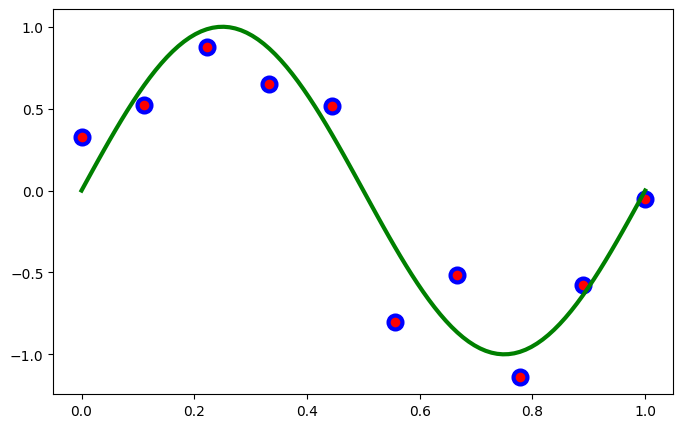

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#标准曲线
x =  np.linspace(0, 1, 100) 
y =  np.sin(2 * np.pi * x)

#采样函数
def get_data(N):
    np.random.seed(1)
    x_n = np.linspace(0,1,N)
    y_n = np.sin(2 * np.pi * x_n) + np.random.normal(scale=0.2, size=N) #add Gaussian Noise
    return x_n, y_n

#采样
x_data, y_data = get_data(10)

#图像绘制部分 
plt.figure(1, figsize=(8,5))
plt.plot(x, y, 'g',linewidth=3) 
plt.scatter(x_data, y_data, c='red', marker='o', edgecolors='b', s=100, linewidth=3, label="training data")


## 2. 模型的建立
后一种情况常假设$x$与$y$之间的关系是一个待定的多项式，多项式系数就是待定的未知参数，从而可采用类似于前一种情况的处理方法：
- 假设他们之间的关系是某个多项式函数$y=y({x},{\bf w})$，求这个具体的多项式函数使其轨迹尽可能的拟合给定点的分布（排列）。
\begin{equation}
y( x,{W}) = w_0 + w_1 x^1 + w_2 {x}^2 + \cdots + w_n {x}^m
\end{equation}
即：

\begin{equation}
y({ x},{W}) = \sum_{i=1}^m w_i {x}^i = XW
\end{equation}

其中:

\begin{equation}
X = \begin{pmatrix}{ x}^0 \\ {x}^1 \\ \vdots \\ { x}^m \end{pmatrix}^T =
\begin{pmatrix}
1 &  x_1 & x_1^2 & \cdots & x_1^m \\
1 &  x_2 & x_2^2 & \cdots & x_2^m \\
\vdots & \vdots & ~ & \vdots \\
1 &  x_n & x_n^2 & \cdots & x_n^m 
\end{pmatrix}
\quad 
W = \begin{pmatrix}w_0 \\ w_1 \\ \vdots \\ w_m \end{pmatrix}
\end{equation}

那么如何用公式形式化的表示以上目标呢？勒让德在19世纪首先采用了以下目标函数，后来称为著名的最小二乘法：

\begin{equation}
E({W}) = \frac{1}{2}\sum_{i=1}^n (y(x_i,{W})-y_i)^2
\end{equation}

其中$y({\bf x},W)$是要求的多项式拟合函数，并且参数为$w$，以上目标函数代表着所有样本点的预测值与实际值之间的平方和。$E({w})$越小，代表多项式拟合函数与真实的数据分布之间的差异越小；因此，求拟合函数转化为求使得以上能量公式最小的${w}$参数。

## 3. 模型的求解

直接对以上目标函数进行转化：
\begin{equation}
E({W}) = \frac{1}{2}\sum_{i=1}^n (y(x_i,W)-y_i)^2 = \frac{1}{2}(XW-Y)^T(XW-Y)
\end{equation}
然后根据多元函数极值条件求最优解(W)：
\begin{equation}
\frac{\partial E(W)}{\partial W} = X^T XW - X^T Y = 0 \\
\Downarrow \\
W = (X^T X)^{-1}X^TY
\end{equation}

In [9]:
#拟合函数（lamda默认为0，即无正则项）
def regress(M, N, x, x_data, y_data, lamda=0):
    order = np.arange(M+1)
    order = order[:, np.newaxis]
    #print(order)
    e = np.tile(order, [1,N])
    #print(e)
    XT = np.power(x_data, e)
    X = np.transpose(XT)
    a = np.matmul(XT, X) + lamda*np.identity(M+1) #X.T * X
    b = np.matmul(XT, y_data) #X.T * Y
    w = np.linalg.solve(a,b) #aW = b => (X.T * X) * W = X.T * Y
    #print("W:")
    #print(w)
    e2 = np.tile(order, [1,x.shape[0]])
    XT2 = np.power(x, e2)
    p = np.matmul(w, XT2)
    return p

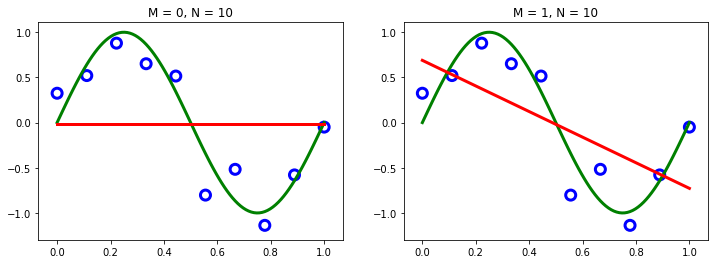

In [10]:
M=0
N=10
plt.figure(2, figsize=(12,4))
p = regress(0, 10, x, x_data, y_data)
plt.subplot(121)
plt.plot(x, y, 'g', x, p, 'r',linewidth=3) 
plt.scatter(x_data, y_data, color='', marker='o', edgecolors='b', s=100, linewidth=3)
plt.title("M = %d, N = %d"%(M,N))

M=1
N=10
plt.subplot(122)
p = regress(1, 10, x, x_data, y_data)
plt.plot(x, y, 'g', x, p, 'r',linewidth=3) 
plt.scatter(x_data, y_data, color='', marker='o', edgecolors='b', s=100, linewidth=3)
plt.title("M = %d, N = %d"%(M,N))
plt.show()

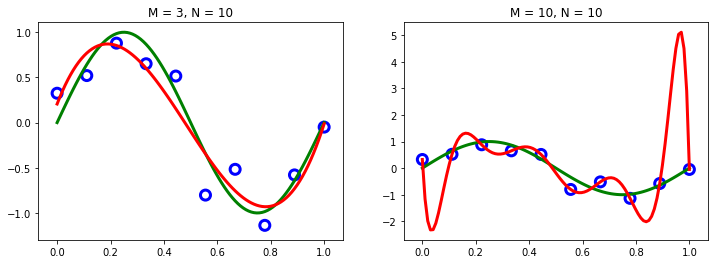

In [11]:
plt.figure(3, figsize=(12,4))

M = 3
N = 10
p = regress(M, N, x, x_data, y_data)
plt.subplot(121)
plt.plot(x, y, 'g', x, p, 'r',linewidth=3) 
plt.scatter(x_data, y_data, color='', marker='o', edgecolors='b', s=100, linewidth=3)
plt.title("M = %d, N = %d"%(M,N))

M = 10
N = 10
plt.subplot(122)
p = regress(M, N, x, x_data, y_data)
plt.plot(x, y, 'g', x, p, 'r',linewidth=3) 
plt.scatter(x_data, y_data, color='', marker='o', edgecolors='b', s=100, linewidth=3)
plt.title("M = %d, N = %d"%(M,N))
plt.show()

### 通过以上拟合实验我们发现：

- 当 M = 0 和 1 时，多项式的拟合效果很差，无法代表目标函数，即欠拟合现象。
- 当 M = 3 时，多项式已经比较接近目标函数。
- 当 M = 10 时，多项式函数精确地通过每个观测点，但是曲线呈现震荡形式并对噪声敏感，出现过拟合现象。
其中，欠拟合和过拟合都无法代表目标函数。

# 4.通过<增加数据量>改善过拟合

模型泛化的能力更好的最好办法就是使用更多的训练数据进行训练,通过增加数据量，使得数据整体分布更加趋近于真实分布，从而削弱了异常数据点所带来的的过拟合的影响。

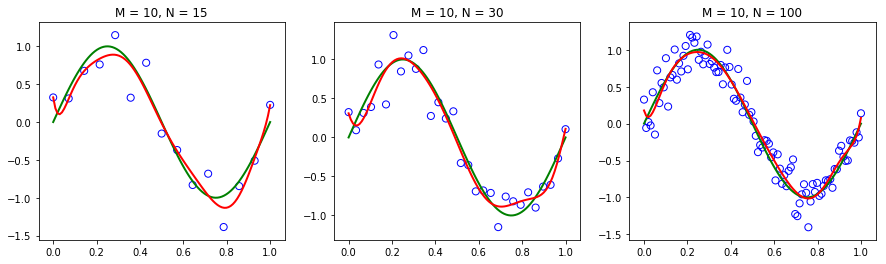

In [12]:
plt.figure(figsize=(15,4))

M=10
N=15
x_data, y_data = get_data(N)
p = regress(M, N, x, x_data, y_data)

plt.subplot(131)
plt.plot(x, y, 'g', x, p, 'r',linewidth=2) 
plt.scatter(x_data, y_data, color='', marker='o', edgecolors='b', s=50, linewidth=1)
plt.title("M = %d, N = %d"%(M,N))

M=10
N=30
x_data, y_data = get_data(N)
p = regress(M, N, x, x_data, y_data)

plt.subplot(132)
plt.plot(x, y, 'g', x, p, 'r',linewidth=2) 
plt.scatter(x_data, y_data, color='', marker='o', edgecolors='b', s=50, linewidth=1)
plt.title("M = %d, N = %d"%(M,N))

M=10
N=100
x_data, y_data = get_data(N)
p = regress(M, N, x, x_data, y_data)

plt.subplot(133)
plt.plot(x, y, 'g', x, p, 'r',linewidth=2) 
plt.scatter(x_data, y_data, color='', marker='o', edgecolors='b', s=50, linewidth=1)
plt.title("M = %d, N = %d"%(M,N))

plt.show()

# 5.通过<正则化>改善过拟合

在当数据量（训练样本）大小一定时，无法通过改变数据集大小来消除过拟合，这时我们通常使用<正则化>的方法来消除过拟合带来的影响。通常我们使用一个目标函数中的惩罚项来抑多项式系数膨胀所带来的的影响：
\begin{equation}
E({W}) = \frac{1}{2}\sum_{i=1}^n (y(x_i,{W})-y_i)^2 +\frac{\lambda}{2}||W||^2
\end{equation}
对上式新的目标函数求导得到：
\begin{equation}
W = (X^T X +\lambda E_{m+1})^{-1}X^T Y
\end{equation}
此时，可以通过改变$\lambda$系数的值来控制惩罚力度。

Text(0.5,1,'M = 10, N = 15, lnλ = -18')

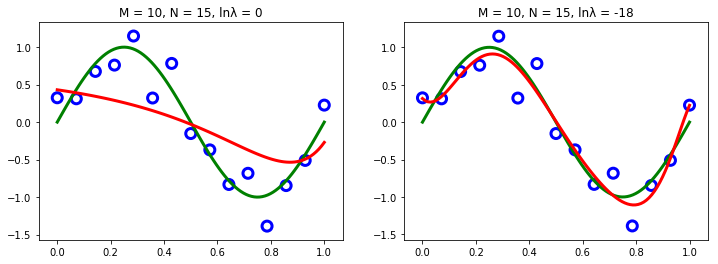

In [13]:
M=10
N=15
x_data, y_data = get_data(N)
plt.figure(figsize=(12,4))

#lnλ = 0
p = regress(M, N, x, x_data, y_data, np.exp(0))

#图像绘制部分
plt.subplot(121)
plt.plot(x, y, 'g', x, p, 'r',linewidth=3) 
plt.scatter(x_data, y_data, color='', marker='o', edgecolors='b', s=100, linewidth=3)
plt.title('M = 10, N = 15')
plt.title("M = %d, N = %d, lnλ = 0"%(M,N))

#lnλ = -18
p = regress(M, N, x, x_data, y_data, np.exp(-18))

#图像绘制部分
plt.subplot(122)
plt.plot(x, y, 'g', x, p, 'r',linewidth=3) 
plt.scatter(x_data, y_data, color='', marker='o', edgecolors='b', s=100, linewidth=3)
plt.title("M = %d, N = %d, lnλ = -18"%(M,N))

通过分析我们知道，加上了正则项后，$\lambda$较小时有效地改善了高阶多项式的过拟合现象，但是当$\lambda$过大时会过度抑制模型系数。所以，根据模型的复杂度来进行合适的正则化对于拟合结果非常重要。

# 6.利用现成的库来求拟合函数

Text(0.5,1,'M = 10, N = 200')

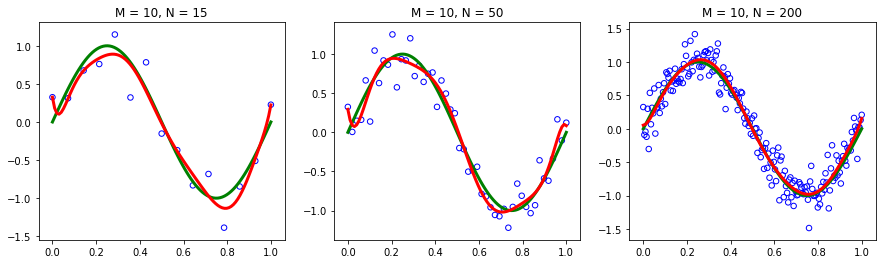

In [14]:
M=10
N=15
plt.figure(figsize=(15,4))

x_data, y_data = get_data(N)
y_1 = np.poly1d(np.polyfit(x_data,y_data,M))(x)

plt.subplot(131)
plt.plot(x, y, 'g', x, y_1, 'r',linewidth=3) 
plt.scatter(x_data, y_data, color='', marker='o', edgecolors='b', s=30, linewidth=1)
plt.title("M = %d, N = %d"%(M,N))

M=10
N=50

x_data, y_data = get_data(N)
y_1 = np.poly1d(np.polyfit(x_data,y_data,M))(x)

plt.subplot(132)
plt.plot(x, y, 'g', x, y_1, 'r',linewidth=3) 
plt.scatter(x_data, y_data, color='', marker='o', edgecolors='b', s=30, linewidth=1)
plt.title("M = %d, N = %d"%(M,N))

M=10
N=200

x_data, y_data = get_data(N)
y_1 = np.poly1d(np.polyfit(x_data,y_data,M))(x)

plt.subplot(133)
plt.plot(x, y, 'g', x, y_1, 'r',linewidth=3) 
plt.scatter(x_data, y_data, color='', marker='o', edgecolors='b', s=30, linewidth=1)
plt.title("M = %d, N = %d"%(M,N))


## 本节作业：请简述【牛顿插值法】和【最小二乘法】的区别